In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
df=pd.read_csv("Social_Network_Ads.csv")

In [29]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [30]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [34]:
df.shape

(400, 5)

In [35]:
X = df.iloc[:, [2, 3]]
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8
Confusion Matrix:
[[46  6]
 [10 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        52
           1       0.75      0.64      0.69        28

    accuracy                           0.80        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.80      0.80      0.80        80



In [40]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=[0,1]).reshape(-1)
print('Output Values: \n',tp,fn,fp,tn )


Output Values: 
 46 6 10 18


In [44]:
accuracy_cm = (tp+tn)/(tp+fp+tn+fn)
precision_cm = tp/ (tp+fp)
recall_cm = tp/ (tp+fn)
f1_score = 2/ ((1/recall_cm)+(1/precision_cm))
Error_rate = (fp+fn)/(tp+fp+tn+fn)
print("Accuracy : ",accuracy_cm)
print("Precision : ",precision_cm)
print("Recall :",recall_cm)
print("F1-Score : ",f1_score)
print("Error Rate:", Error_rate)


Accuracy :  0.8
Precision :  0.8214285714285714
Recall : 0.8846153846153846
F1-Score :  0.8518518518518517
Error Rate: 0.2


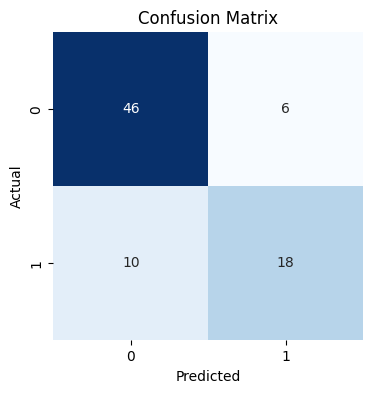

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()